In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading data
df = pd.read_csv("EV_data.csv")
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [6]:
df.shape

(103, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccelSec,103.0,7.396117,3.017430,2.1,5.1,7.3,9.0,22.4
TopSpeed_KmH,103.0,179.194175,43.573030,123.0,150.0,160.0,200.0,410.0
Range_Km,103.0,338.786408,126.014444,95.0,250.0,340.0,400.0,970.0
Efficiency_WhKm,103.0,189.165049,29.566839,104.0,168.0,180.0,203.0,273.0
Seats,103.0,4.883495,0.795834,2.0,5.0,5.0,5.0,7.0
PriceEuro,103.0,55811.563107,34134.665280,20129.0,34429.5,45000.0,65000.0,215000.0


In [9]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [10]:
#checking Duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
98     False
99     False
100    False
101    False
102    False
Length: 103, dtype: bool

In [11]:
df.duplicated().sum()

0

In [12]:
#Checking null values
df.isnull().mean()

Brand              0.0
Model              0.0
AccelSec           0.0
TopSpeed_KmH       0.0
Range_Km           0.0
Efficiency_WhKm    0.0
FastCharge_KmH     0.0
RapidCharge        0.0
PowerTrain         0.0
PlugType           0.0
BodyStyle          0.0
Segment            0.0
Seats              0.0
PriceEuro          0.0
dtype: float64

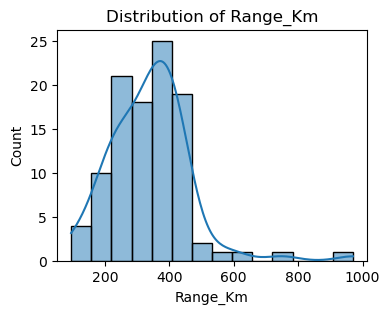

In [13]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Range_Km'], kde=True)

plt.title('Distribution of Range_Km')
plt.xlabel('Range_Km')
plt.ylabel('Count')
plt.show()

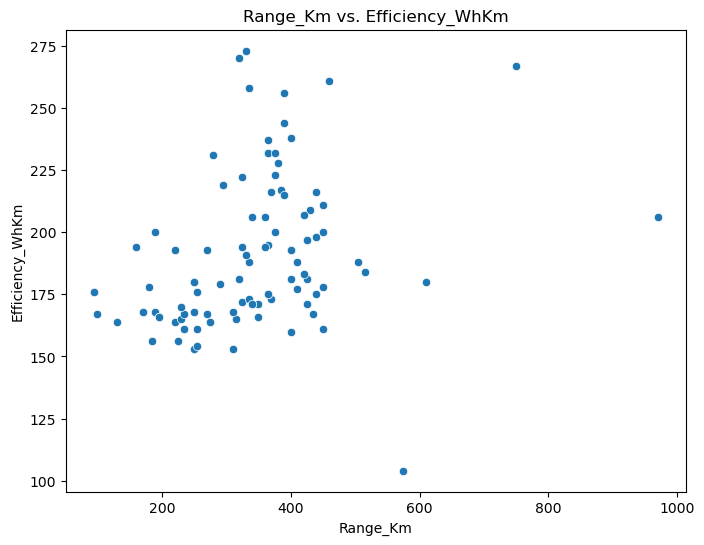

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Range_Km', y='Efficiency_WhKm')

plt.title('Range_Km vs. Efficiency_WhKm')
plt.xlabel('Range_Km')
plt.ylabel('Efficiency_WhKm')
plt.show()

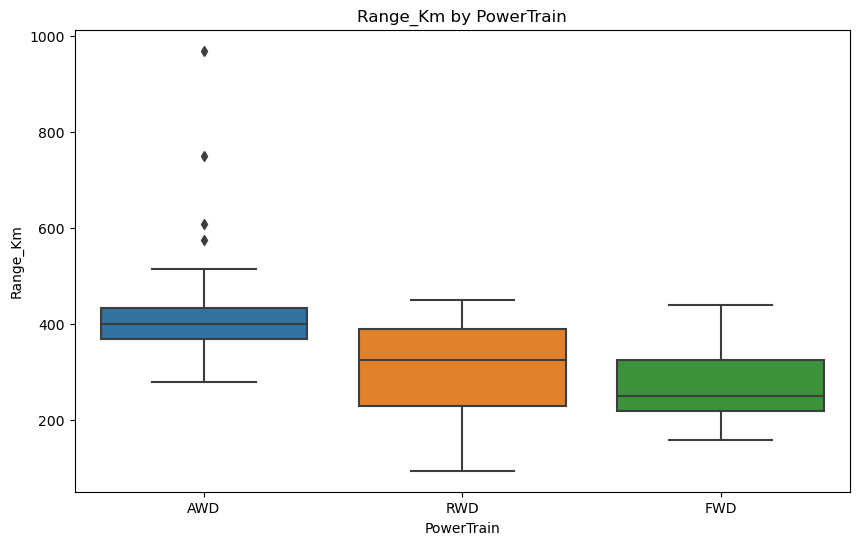

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PowerTrain', y='Range_Km')

plt.title('Range_Km by PowerTrain')
plt.xlabel('PowerTrain')
plt.ylabel('Range_Km')
plt.show()

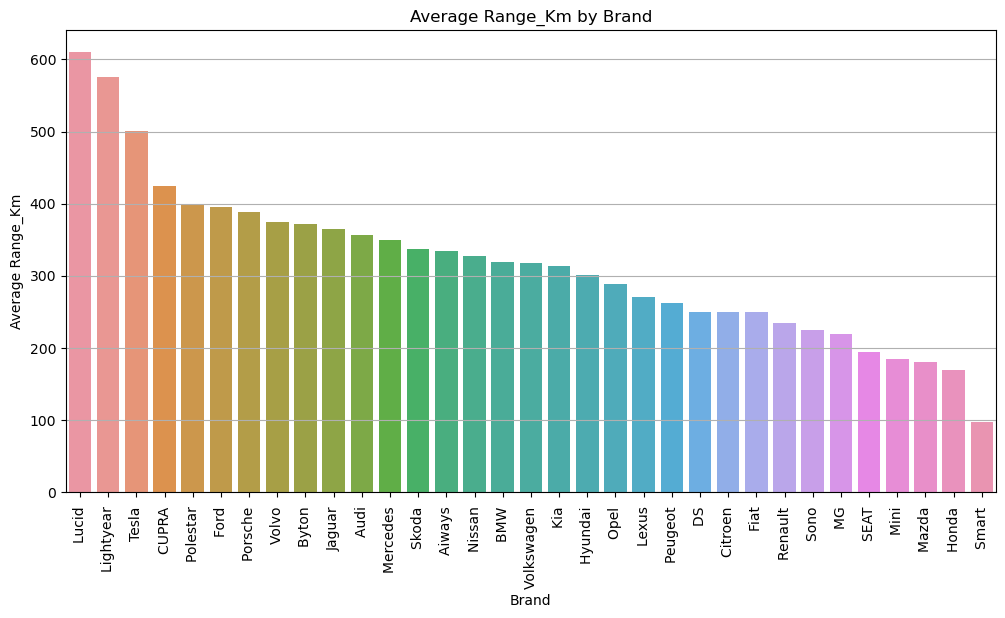

In [13]:
plt.figure(figsize=(12, 6))

avg_range_by_brand = df.groupby('Brand')['Range_Km'].mean().sort_values(ascending=False)
sns.barplot(x=avg_range_by_brand.index, y=avg_range_by_brand.values)

plt.grid(axis='y')
plt.title('Average Range_Km by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Range_Km')
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

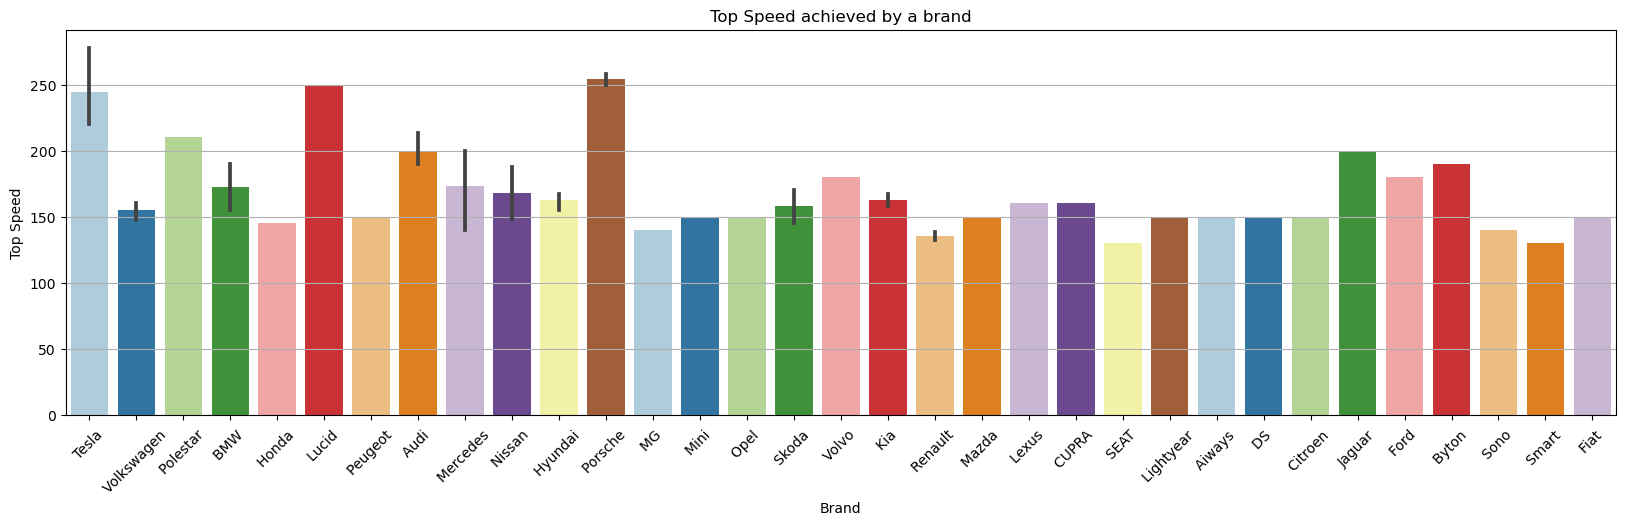

In [14]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')

plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

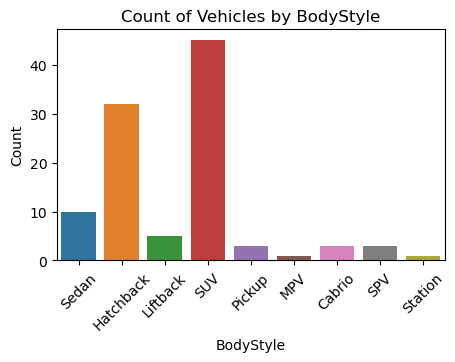

In [15]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df, x='BodyStyle')

plt.title('Count of Vehicles by BodyStyle')
plt.xlabel('BodyStyle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

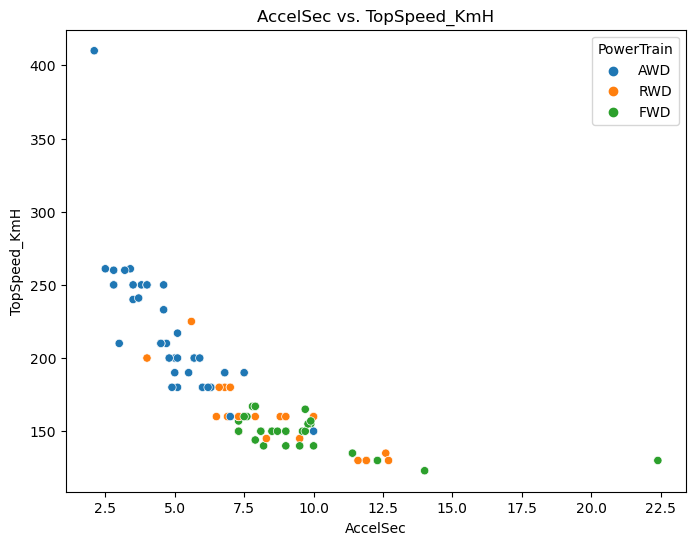

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AccelSec', y='TopSpeed_KmH', hue='PowerTrain')

plt.title('AccelSec vs. TopSpeed_KmH')
plt.xlabel('AccelSec')
plt.ylabel('TopSpeed_KmH')
plt.show()

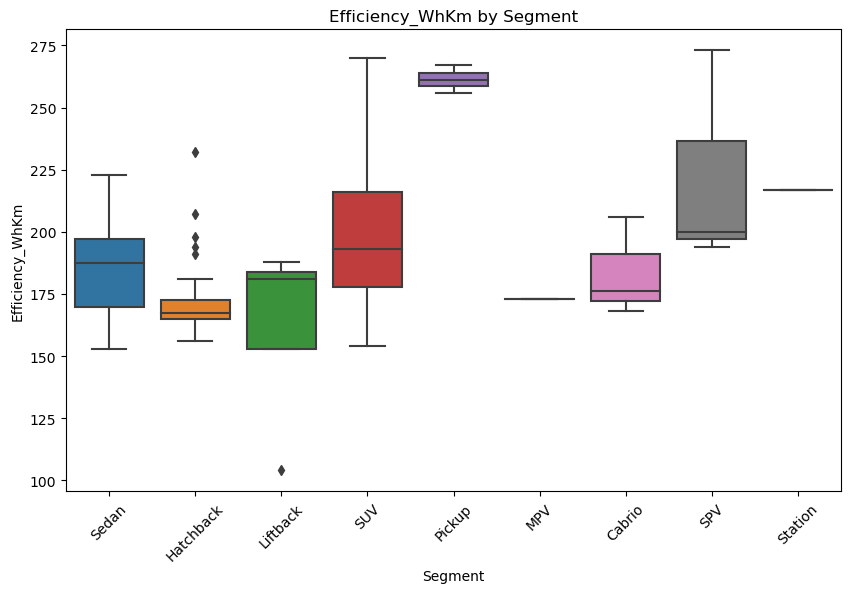

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BodyStyle', y='Efficiency_WhKm')

plt.title('Efficiency_WhKm by Segment')
plt.xlabel('Segment')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation=45)
plt.show()

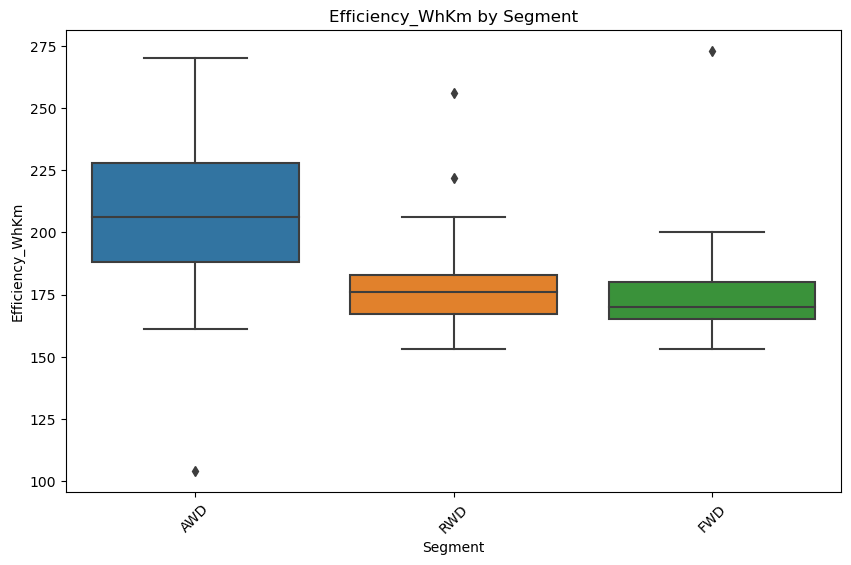

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PowerTrain', y='Efficiency_WhKm')

plt.title('Efficiency_WhKm by Segment')
plt.xlabel('Segment')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation=45)
plt.show()

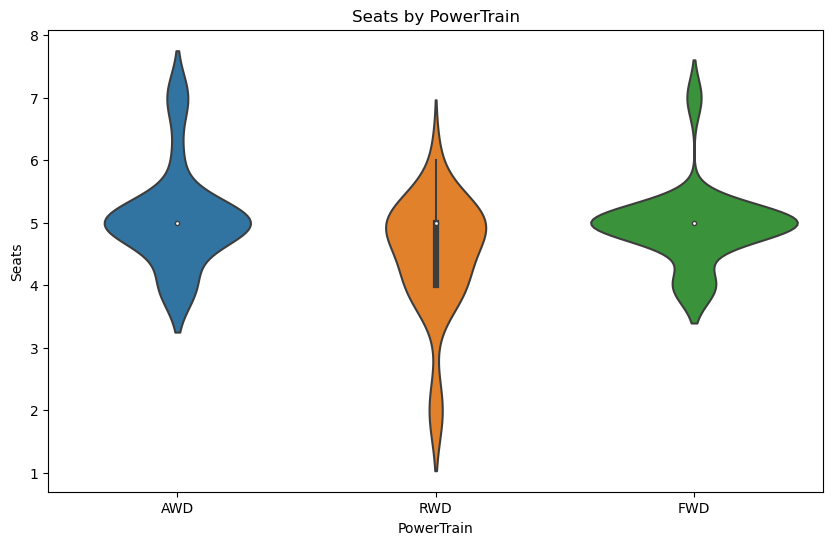

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='PowerTrain', y='Seats')

plt.title('Seats by PowerTrain')
plt.xlabel('PowerTrain')
plt.ylabel('Seats')
plt.show()

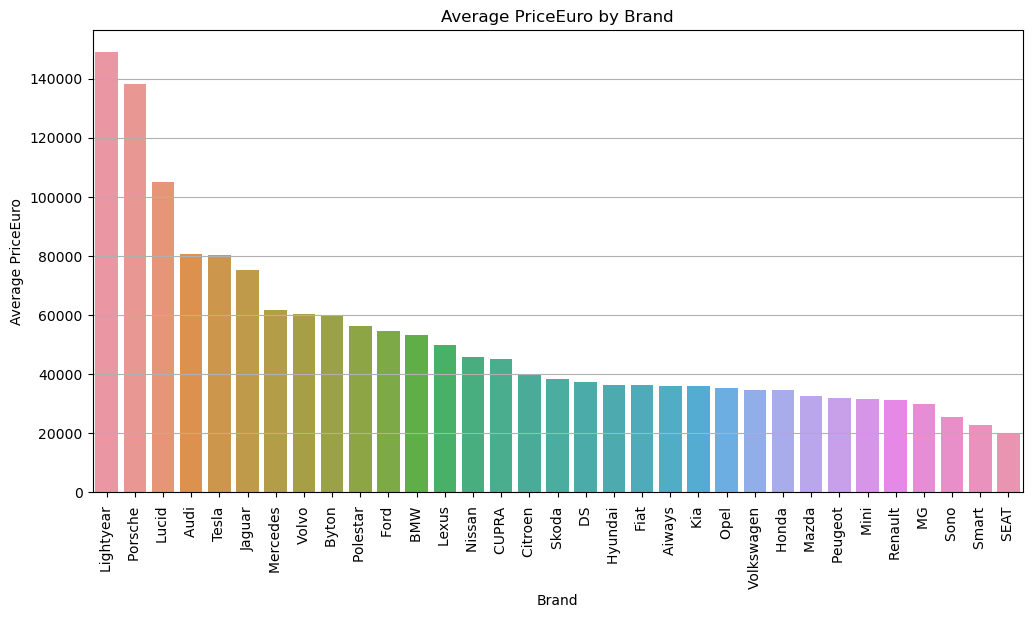

In [20]:
plt.figure(figsize=(12, 6))

avg_price_by_brand = df.groupby('Brand')['PriceEuro'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values)

plt.grid(axis='y')
plt.title('Average PriceEuro by Brand')
plt.xlabel('Brand')
plt.ylabel('Average PriceEuro')
plt.xticks(rotation=90)
plt.show()

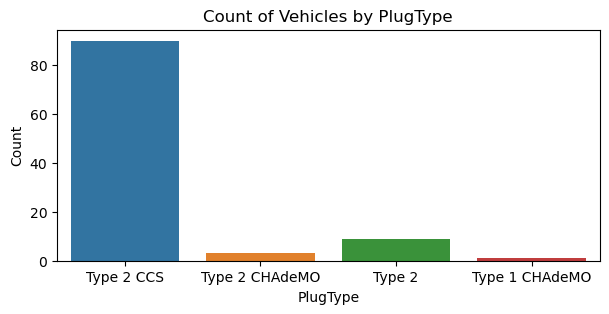

In [21]:
plt.figure(figsize=(7,3))
sns.countplot(data=df, x='PlugType')

plt.title('Count of Vehicles by PlugType')
plt.xlabel('PlugType')
plt.ylabel('Count')

plt.show()

In [22]:
correlation_matrix = df.corr()
print(correlation_matrix)

                 AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm     Seats  \
AccelSec         1.000000     -0.786195 -0.677062        -0.382904 -0.175335   
TopSpeed_KmH    -0.786195      1.000000  0.746662         0.355675  0.126470   
Range_Km        -0.677062      0.746662  1.000000         0.313077  0.300163   
Efficiency_WhKm -0.382904      0.355675  0.313077         1.000000  0.301230   
Seats           -0.175335      0.126470  0.300163         0.301230  1.000000   
PriceEuro       -0.627174      0.829057  0.674844         0.396705  0.020920   

                 PriceEuro  
AccelSec         -0.627174  
TopSpeed_KmH      0.829057  
Range_Km          0.674844  
Efficiency_WhKm   0.396705  
Seats             0.020920  
PriceEuro         1.000000  


C:\Users\viddy\AppData\Local\Temp\ipykernel_4008\2020863294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


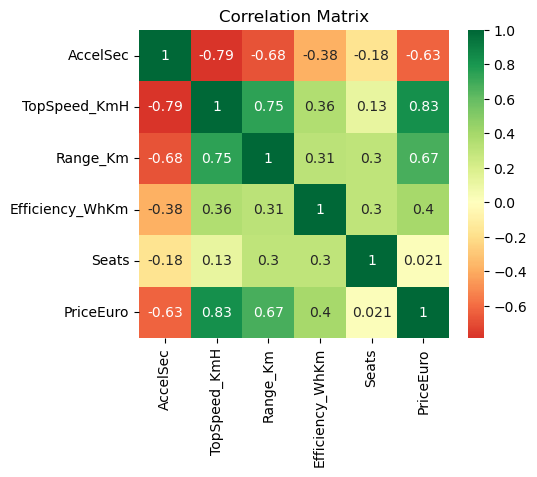

In [23]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation Matrix')
plt.show()

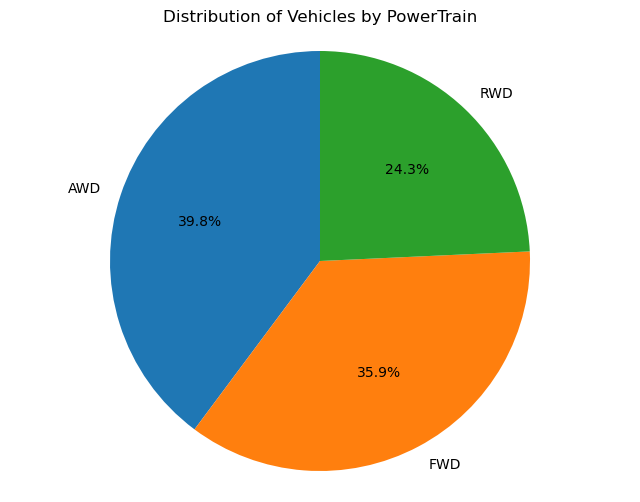

In [26]:
powertrain_counts = df['PowerTrain'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(powertrain_counts, labels=powertrain_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Vehicles by PowerTrain')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

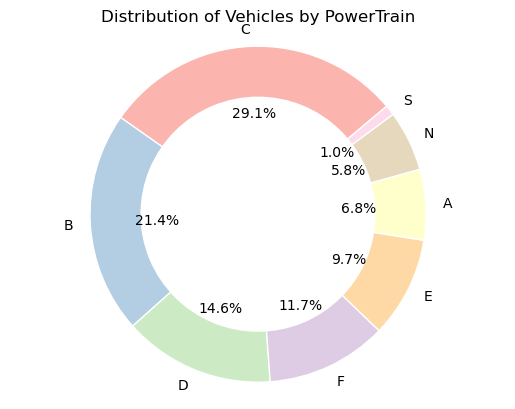

In [31]:
outer_colors = sns.color_palette('Pastel1')
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle= 40,
        colors=outer_colors, wedgeprops={'width': 0.5, 'edgecolor': 'white'})

# Inner ring (hole in the donut)
inner_radius = 0.7
plt.pie([1], radius=inner_radius, colors='white')

plt.title('Distribution of Vehicles by PowerTrain')
plt.axis('equal')  
plt.show()

# Observations : 

- Distribution of Range_km histogram Data follows Positive distribution. It shows most of the ev cars having 200 to 450 km range.
- Range_Km vs Efficiency_WhKm scatterplot shows that As "Range is increases Efficiency also increases".
- Lucid,Lightyear and Tesla brands has "Average Range" above 500 Km, Smart brand has avg range below 100 km.
- Tesla, Lucid and Porsche brand's cars have "Top speed" 250 KmH and above.
- Lightyear and Prorsche "car's price" is above 120000 Euro.
- 80% EV has "Type 2 CCS PlugType".
- In our dataset, we have most of the cars from "SUV" and "Hatchback" segment and we have 40% AWD(All Wheel Drive),36% FWD(Front Wheel Drive) and 24% RWD(Rear Wheel Drive).